In [1]:
# Logistic Regression

# Used to predict the value of a numeric continuous variable based
# on its relationship with predictor variables

In [2]:
# Use cases

# Customer Churn Prediction
# Employee Attrition Modeling
# Hazardous Event Prediction
# Purchase Propensity vs. Ad Spend Analysis

In [3]:
# Assumptions

# Data is free of missing values
# The predictant variable is binary or ordinal(categorical with ordered values)
# All predictors are independent of each other
# There are atleast 50 observations per predictor variable ( to ensure reliable results)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [6]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

In [7]:
# Logistic Regression on the titanic dataset

address = "/home/rohan/LinkedIn/Python for Data Science Essential Training Part 2/Data/titanic-training-data.csv"
titanic_training = pd.read_csv(address)
titanic_training.columns = ["PassengerId", "Survived", "PClass", "Name", "Sex", "Age","SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"]

titanic_training.head()

,PassengerId,Survived,PClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
print(titanic_training.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   PClass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


<AxesSubplot: xlabel='Survived', ylabel='count'>

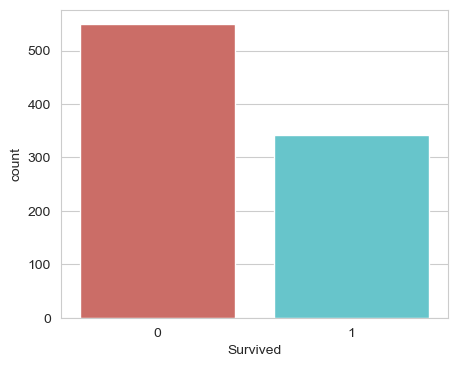

In [9]:
# Checking the assumptions

# Check if the target variable is binary

sb.countplot(x="Survived", data=titanic_training, palette="hls")

In [10]:
# Checking for missing values

titanic_training.isnull().sum()

PassengerId      0
Survived         0
PClass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
titanic_training.describe()

,PassengerId,Survived,PClass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# Features not needed
titanic_training = titanic_training.drop(['Name', 'Ticket', 'Cabin'],axis=1)
titanic_training.head(5)

,PassengerId,Survived,PClass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


<AxesSubplot: xlabel='Parch', ylabel='Age'>

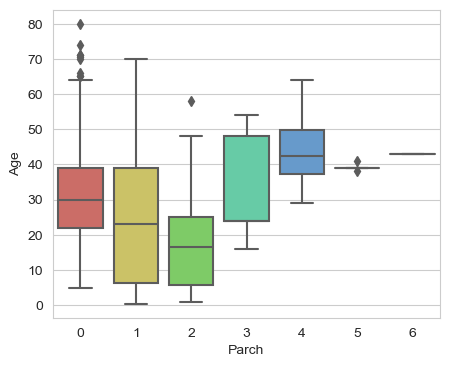

In [13]:
# Making a boxplot to check the relationship b/w Age and Parch
# To fill in for the missing Age entries in the dataset


sb.boxplot(x="Parch",y='Age', data=titanic_training,palette='hls')

In [14]:
Parch_groups = titanic_training.groupby(titanic_training["Parch"])
Parch_groups.mean()

/tmp/ipykernel_31693/3805904243.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Parch_groups.mean()


,PassengerId,Survived,PClass,Age,SibSp,Fare
Parch,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774
1,465.110169,0.550847,2.203390,24.422000,1.084746,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


In [15]:
def age_approx(cols):
    Age = cols[0]
    Parch = cols[1]
    
    if pd.isnull(Age):
        if Parch == 0:
            return 32
        elif Parch == 1:
            return 24
        elif Parch == 2:
            return 17
        elif Parch == 3:
            return 33
        elif Parch == 4:
            return 45
        else:
            return 30 # Returning the mean value for age
    else: return Age

In [16]:
titanic_training['Age'] = titanic_training[['Age', 'Parch']].apply(age_approx, axis=1)
titanic_training.isnull().sum()

PassengerId    0
Survived       0
PClass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [17]:
titanic_training['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    17.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [18]:
# Drop the rows with missing values and reset the index
titanic_training.dropna(inplace = True)
titanic_training.reset_index(inplace=True,drop=0)
titanic_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        889 non-null    int64  
 1   PassengerId  889 non-null    int64  
 2   Survived     889 non-null    int64  
 3   PClass       889 non-null    int64  
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(2)
memory usage: 69.6+ KB


In [19]:
# Converting categorical variables to a dummy indicator

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
# Convert Sex variable into Numeric

gender_cat = titanic_training["Sex"]
gender_encoded = label_encoder.fit_transform(gender_cat)
gender_encoded[:10]

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0])

In [20]:
# Male = 1, Female = 0

# Create a gender dataframe
gender_df = pd.DataFrame(gender_encoded, columns=["Male_Gender"])
gender_df.head()

,Male_Gender
0,1
1,0
2,0
3,0
4,1


In [21]:
embarked_cat = titanic_training['Embarked']
embarked_encoded = label_encoder.fit_transform(embarked_cat)
embarked_encoded[:100]

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2])

In [22]:
from sklearn.preprocessing import OneHotEncoder

binary_encoder = OneHotEncoder(categories='auto')
embarked_onehot = binary_encoder.fit_transform(embarked_encoded.reshape(-1,1))
embarked_onehot_matrix = embarked_onehot.toarray()

embarked_df = pd.DataFrame(embarked_onehot_matrix, columns=['C', 'Q', 'S'])
embarked_df.head()

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [23]:
titanic_training.head()

,index,PassengerId,Survived,PClass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,0,3,male,22.0,1,0,7.2500,S
1,1,2,1,1,female,38.0,1,0,71.2833,C
2,2,3,1,3,female,26.0,0,0,7.9250,S
3,3,4,1,1,female,35.0,1,0,53.1000,S
4,4,5,0,3,male,35.0,0,0,8.0500,S


In [25]:
titanic_training.drop(['index','Sex','Embarked'],axis=1,inplace=True)
titanic_training.head()

,PassengerId,Survived,PClass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [26]:
titanic_training.columns

Index(['PassengerId', 'Survived', 'PClass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [27]:
titanic_dmy = pd.concat([titanic_training, gender_df, embarked_df], axis=1, verify_integrity=True)
titanic_dmy[0:5]

,PassengerId,Survived,PClass,Age,SibSp,Parch,Fare,Male_Gender,C,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,0,1.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,0,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,1,0.0,0.0,1.0


<AxesSubplot: >

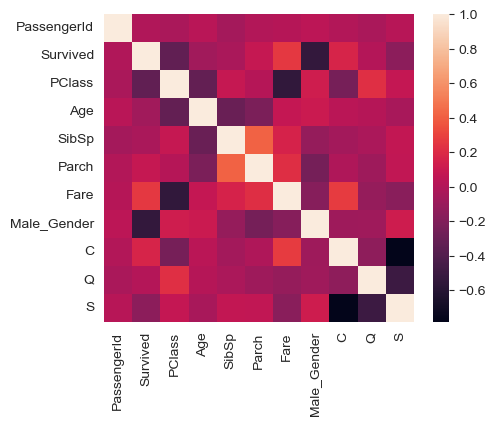

In [28]:
# Check for independence of variables

sb.heatmap(titanic_dmy.corr())

In [29]:
# As one of the requirements is that the variables are independent
# of one another, we drop the PClass and Fare columns because they're
# clearly indicated in black boxes

titanic_dmy.drop(['PClass','Fare'],axis=1,inplace=True)
titanic_dmy.head()

,PassengerId,Survived,Age,SibSp,Parch,Male_Gender,C,Q,S
0,1,0,22.0,1,0,1,0.0,0.0,1.0
1,2,1,38.0,1,0,0,1.0,0.0,0.0
2,3,1,26.0,0,0,0,0.0,0.0,1.0
3,4,1,35.0,1,0,0,0.0,0.0,1.0
4,5,0,35.0,0,0,1,0.0,0.0,1.0


In [30]:
# Checking that your dataset size is sufficient

titanic_dmy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Age          889 non-null    float64
 3   SibSp        889 non-null    int64  
 4   Parch        889 non-null    int64  
 5   Male_Gender  889 non-null    int64  
 6   C            889 non-null    float64
 7   Q            889 non-null    float64
 8   S            889 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 62.6 KB


In [31]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(titanic_dmy.drop(['Survived'], axis=1), titanic_dmy['Survived'], test_size=0.2, random_state=200)

In [32]:
print(X_train.shape)
print(y_train.shape)

(711, 8)
(711,)


In [33]:
X_train[:5]

,PassengerId,Age,SibSp,Parch,Male_Gender,C,Q,S
719,721,6.0,0,1,0,0.0,0.0,1.0
165,167,24.0,0,1,0,0.0,0.0,1.0
879,882,33.0,0,0,1,0.0,0.0,1.0
451,453,30.0,0,0,1,1.0,0.0,0.0
181,183,9.0,4,2,1,0.0,0.0,1.0


In [34]:
# Deploying and evaluating the model

In [35]:
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [36]:
y_pred = log_reg.predict(X_test)

In [37]:
# Model Evaluation

# Classification report without cross-validation

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       109
           1       0.79      0.71      0.75        69

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



In [38]:
# K-fold cross-validation & confusion matrices

In [39]:
y_train_pred = cross_val_predict(log_reg, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[377,  63],
       [ 91, 180]])

In [41]:
precision_score(y_train, y_train_pred)

0.7407407407407407

In [42]:
# Making a test prediction

In [43]:
titanic_dmy[863:864]

,PassengerId,Survived,Age,SibSp,Parch,Male_Gender,C,Q,S
863,866,1,42.0,0,0,0,0.0,0.0,1.0


In [44]:
test_passenger = np.array([866, 40, 0, 0, 0, 0, 0, 1]).reshape(1,-1)

print(log_reg.predict(test_passenger))
print(log_reg.predict_proba(test_passenger))

[1]
[[0.26351831 0.73648169]]


/usr/lib/python3/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
